In [112]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math as math

In [6]:
def f(mat):
    mat[:,2] = mat[:,0]/mat[:,1]
    return mat

In [7]:
triple = np.zeros((100,3))


x = 1.0
y = 1.0
for i in range( len(triple) ): 
    triple[i,0]=x
    triple[i,1]=y
    y+=1.0
    if y==11.0:
        x +=1.0
        y = 1.0
        
triple = f(triple)
np.random.shuffle(triple)
print (triple)

[[10.          8.          1.25      ]
 [ 4.          8.          0.5       ]
 [10.          1.         10.        ]
 [10.          5.          2.        ]
 [ 1.          1.          1.        ]
 [ 7.          3.          2.33333333]
 [ 7.          5.          1.4       ]
 [ 2.          7.          0.28571429]
 [ 1.         10.          0.1       ]
 [ 2.          4.          0.5       ]
 [ 7.          8.          0.875     ]
 [ 9.          5.          1.8       ]
 [ 9.          2.          4.5       ]
 [ 3.          4.          0.75      ]
 [ 9.          8.          1.125     ]
 [ 7.          7.          1.        ]
 [ 5.          1.          5.        ]
 [ 4.          5.          0.8       ]
 [ 8.          7.          1.14285714]
 [ 2.          3.          0.66666667]
 [ 4.          9.          0.44444444]
 [ 8.          6.          1.33333333]
 [ 4.          2.          2.        ]
 [ 4.          7.          0.57142857]
 [ 2.          8.          0.25      ]
 [ 1.          9.        

In [20]:
train_data = triple[ :70 , :]
validate_data = triple[70: , :] 

In [21]:
def Sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

def ReLU(x):
    return np.maximum(x,0)

def ReLU_der(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def Sigmoid_Der(x):
    return Sigmoid(x) * (1. - Sigmoid(x))

def No_function(x):
    return x

def No_function_der(x):
    return 1
    

In [149]:

def Forward( w, o, activation_fun, bias=0  ):
    z = np.matmul( w, o )
    return z+bias, activation_fun(z+bias)

def ErrorFunction(o, y):
    return ((o - y) ** 2)/2

def NN(x, y):
    #No of Neuron
    n1 = 4
    n2 = 3
    
    #No of input and output
    m = x.shape[0]
    
    w1 = np.random.rand(n1,2)
    b1 = np.random.rand(n1,1)
    
    w2 = np.random.rand(n2,n1)
    b2 = np.random.rand(n2,1)
    
    w3 = np.random.rand(1,n2)
    ones = np.ones((m,1))
    
    eta = 0.000001
    prev_RMSE = 0.2
    RMSE = 0.1
    apple = 0
    while int(RMSE * (10**7)) != int (prev_RMSE * (10**7)):
        z1=x
        o1=z1
        
        #Feed Forward
        z2 = np.matmul(o1,w1.T)
        OneB1 = np.matmul( ones,b1.T )
        o2 = ReLU( z2 + OneB1 )

        z3 = np.matmul( o2, w2.T )
        OneB2 = np.matmul( ones,b2.T )
        o3 = ReLU( z3 + OneB2 )

        z4 = np.matmul( o3, w3.T )
        o4 = z4

        #Mean Square Error
        error = ErrorFunction(o4,y)
        MSE = np.sum(error)
        prev_RMSE = copy.deepcopy(RMSE)
        RMSE = np.sqrt(MSE) / np.size(error)

        #Back Propagation
        #3rd Layer
        loss3 = o4 - y
        dw3 = np.matmul( np.multiply( loss3, ReLU_der(z4) ).T, o3 )
    
        #2nd Layer
        loss2 = np.matmul( np.multiply( loss3, ReLU_der(z4)), w3  )
        dw2 = np.matmul( np.multiply( loss2, ReLU_der(z3+OneB2) ).T, o2 )
        db2 = np.matmul( np.multiply( loss2, ReLU_der(z3+OneB2) ).T, ones )
        
        #1st Layer
        loss1 = np.matmul( np.multiply( loss2, ReLU_der(z3+OneB2)), w2  )
        dw1 = np.matmul( np.multiply( loss1, ReLU_der(z2+OneB1) ).T, o1 )
        db1 = np.matmul( np.multiply( loss1, ReLU_der(z2+OneB1) ).T, ones )

        w3 -= eta * dw3
        w2 -= eta * dw2
        b2 -= eta * db2
        w1 -= eta * dw1
        b1 -= eta * db1
        apple+=1
    print(apple)
    return w3,w2,b2,w1,b1

In [150]:
train_Y = train_data[:,2]
train_Y = train_Y.reshape(( len(train_Y), 1))

train_X = train_data[:, 0:2]

w3,w2,b2,w1,b1 = NN(train_X, train_Y)

79058


In [151]:
o1 = train_X
m = train_X.shape[0]
ones = np.ones((m,1))

#Feed Forward
z2 = np.matmul(o1,w1.T)
OneB1 = np.matmul( ones,b1.T )
o2 = ReLU( z2 + OneB1 )

z3 = np.matmul( o2, w2.T )
OneB2 = np.matmul( ones,b2.T )
o3 = ReLU( z3 + OneB2 )

z4 = np.matmul( o3, w3.T )
print(z4,train_Y)

[[1.48483287]
 [0.38346183]
 [9.71394876]
 [2.25048042]
 [0.95445221]
 [1.90728871]
 [1.39177965]
 [0.24992662]
 [0.16528572]
 [0.42109399]
 [0.93414735]
 [1.96424683]
 [5.76424945]
 [0.60465583]
 [1.30127103]
 [1.03533631]
 [4.84756179]
 [0.68702871]
 [1.21889815]
 [0.52228295]
 [0.28227287]
 [1.4202587 ]
 [1.30634247]
 [0.48465079]
 [0.2297519 ]
 [0.18546043]
 [8.74067136]
 [0.237636  ]
 [1.7064923 ]
 [0.27010133]
 [0.25386867]
 [1.67801324]
 [1.87113988]
 [1.62105512]
 [0.87059055]
 [0.54820759]
 [1.93576777]
 [0.58583975]
 [1.07706699]
 [0.7908334 ]
 [1.02010888]
 [7.76739397]
 [3.76110494]
 [1.01652023]
 [0.31990503]
 [5.82083918]
 [2.50823496]
 [0.24598456]
 [0.22580985]
 [0.30108895]
 [0.76235434]
 [1.11770919]
 [1.13652527]
 [1.28245495]
 [0.20957719]
 [0.26615928]
 [1.73497136]
 [3.87428439]
 [0.76940159]
 [0.85177447]
 [1.44873776]
 [0.64939655]
 [2.78782754]
 [0.21351924]
 [1.64953418]
 [0.36464575]
 [0.18940248]
 [2.84441727]
 [1.20008207]
 [0.46583471]] [[ 1.25      ]
 [ 0

In [153]:
validate_Y = validate_data[:,2]
validate_Y = validate_Y.reshape(( len(validate_Y), 1))
validate_X = validate_data[:, 0:2]

o1 = validate_X
m = validate_X.shape[0]
ones = np.ones((m,1))

#Feed Forward
z2 = np.matmul(o1,w1.T)
OneB1 = np.matmul( ones,b1.T )
o2 = ReLU( z2 + OneB1 )

z3 = np.matmul( o2, w2.T )
OneB2 = np.matmul( ones,b2.T )
o3 = ReLU( z3 + OneB2 )

z4 = np.matmul( o3, w3.T )
predict_Y = z4

print ("Predicted Result\n",predict_Y)
print ("\nActual Result\n", validate_Y)

error = ErrorFunction(predict_Y,validate_Y)
#Mean Square Error
MSE = np.sum(error) 
RMSE = np.sqrt(MSE) / np.size(error)

print ("\nRoot Mean Square Error:",RMSE)

Predicted Result
 [[1.04858793]
 [0.83295839]
 [4.79097206]
 [1.99272589]
 [1.92772961]
 [0.95296343]
 [1.36330059]
 [1.09889311]
 [0.56702367]
 [1.38364391]
 [0.73176943]
 [0.28633399]
 [6.73752685]
 [0.73387528]
 [2.22200136]
 [0.50346687]
 [0.40227791]
 [0.75058551]
 [3.81769467]
 [6.79411658]
 [1.33482153]
 [0.44764169]
 [0.20563514]
 [0.33872111]
 [1.10554605]
 [2.901007  ]
 [0.66821263]
 [0.23369395]
 [0.91533127]
 [2.1935223 ]]

Actual Result
 [[1.33333333]
 [0.77777778]
 [4.        ]
 [1.66666667]
 [2.        ]
 [1.        ]
 [1.5       ]
 [0.9       ]
 [0.625     ]
 [1.11111111]
 [0.7       ]
 [0.25      ]
 [5.        ]
 [1.        ]
 [2.25      ]
 [0.6       ]
 [0.5       ]
 [0.75      ]
 [3.5       ]
 [7.        ]
 [1.66666667]
 [0.5       ]
 [0.125     ]
 [0.33333333]
 [1.2       ]
 [3.        ]
 [0.71428571]
 [0.33333333]
 [0.8       ]
 [2.66666667]]

Root Mean Square Error: 0.05056264806207562


Text(0, 0.5, 'Y')

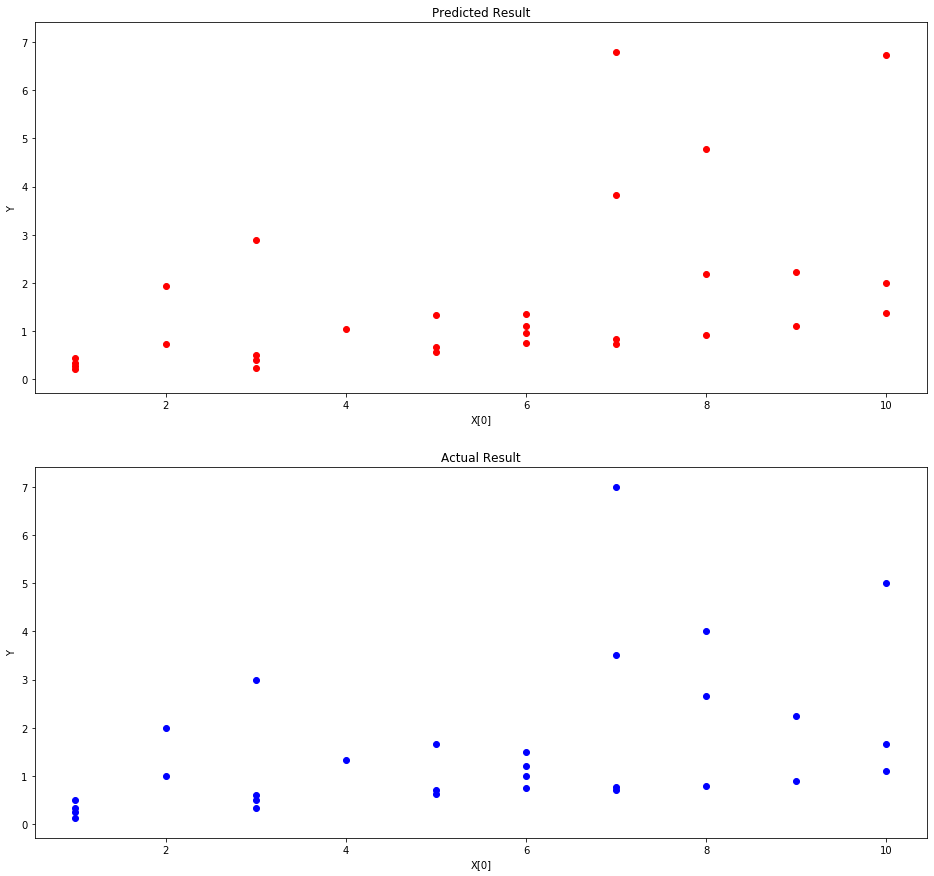

In [154]:
fig, arr = plt.subplots(nrows=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(15)

arr[0].scatter (validate_X[:,0], predict_Y, c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_xlabel('X[0]')
arr[0].set_ylabel('Y')

arr[1].scatter (validate_X[:,0], validate_Y, c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('X[0]')
arr[1].set_ylabel('Y')